<a href="https://colab.research.google.com/github/MiguelEuripedes/embedded_AI/blob/main/Projects/first_image_classifier/knn_classifier/Test_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your First Image Classifier: Using k-NN to Classify Images

## Test

The purpose of this dataset is to correctly classify an image as containing a dog, cat, or panda. Containing only 3,000 images, the Animals dataset is meant to be another introductory dataset that we can quickly train a KNN model and obtain initial results (no so good accuracy) that has potential to be used as a baseline.

Let's take the following steps:

1. Download the encoder and model artifacts
2. Evaluate the model using the test dataset
3. Create an interactive table


### Step 01: Setup

Start out by installing the experiment tracking library and setting up your free W&B account:

* **pip install wandb** – Install the W&B library
* **import wandb** – Import the wandb library
* **wandb login** – Login to your W&B account so you can log all your metrics in one place

In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 182 kB 65.3 MB/s 
     |████████████████████████████████| 162 kB 45.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 162 kB 47.6 MB/s 
     |████████████████████████████████| 158 kB 50.4 MB/s 
     |████████████████████████████████| 157 kB 48.9 MB/s 
     |████████████████████████████████| 157 kB 62.0 MB/s 
     |████████████████████████████████| 157 kB 66.5 MB/s 
     |████████████████████████████████| 157 kB 59.8 MB/s 
     |████████████████████████████████| 157 kB 66.9 MB/s 
     |████████████████████████████████| 157 kB 54.8 MB/s 
     |████████████████████████████████| 157 kB 64.0 MB/s 
     |████████████████████████████████| 156 kB 42.4 MB/s 


In [ ]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#### Import Packages

In [ ]:
from imutils import paths
import logging
import os
import cv2
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

Configure logging reference for a logging object

In [ ]:
logger = logging.getLogger()

Set the level of logging

In [ ]:
logger.setLevel(logging.INFO)

Create handler

In [ ]:
c_handler = logging.StreamHandler()
c_format = logging.Formatter(fmt="%(asctime)s %(message)s",datefmt='%d-%m-%Y %H:%M:%S')
c_handler.setFormatter(c_format)

Add handler to the Logger

In [ ]:
logger.handlers[0] = c_handler

### Step 02: Test Evaluation

since we are using Jupyter Notebooks we can replace our argument parsing code with *hard coded* arguments and values

In [ ]:
args = {
  "project_name": "first_image_classifier",
  "test_feature_artifact": "test_x:latest",
  "test_target_artifact": "test_y:latest",
  "encoder": "target_encoder:latest",
  "inference_model": "model:latest",
  "deploy": "inference_result"
}

Open the W&B project created in the Fetch step

In [ ]:
run = wandb.init(entity="euripedes",project=args["project_name"], job_type="Test")

wandb: Currently logged in as: euripedes. Use `wandb login --relogin` to force relogin


In [ ]:
logger.info("Downloading the test data")

13-10-2022 02:00:27 Downloading the test data


In [ ]:
test_x_artifact = run.use_artifact(args["test_feature_artifact"])
test_x_path = test_x_artifact.file()
test_y_artifact = run.use_artifact(args["test_target_artifact"])
test_y_path = test_y_artifact.file()

Unpacking the artifacts

In [ ]:
test_x = joblib.load(test_x_path)
test_y = joblib.load(test_y_path)

---

In [ ]:
logger.info("Downloading the encoder and inference model")

13-10-2022 02:00:37 Downloading the encoder and inference model


In [ ]:
encoder_artifact = run.use_artifact(args["encoder"])
encoder_path = encoder_artifact.file()

In [ ]:
model_artifact = run.use_artifact(args["inference_model"])
model_path = model_artifact.file()

Unpacking the artifacts 

In [ ]:
encoder = joblib.load(encoder_path)
model = joblib.load(model_path)

Encode the labels as integers

In [ ]:
test_y = encoder.transform(test_y)

Train a k-NN classifier on the raw pixel intensities

In [ ]:
logger.info("[INFO] evaluating k-NN classifier...")
predict = model.predict(test_x)

13-10-2022 02:00:46 [INFO] evaluating k-NN classifier...


In [ ]:
print(classification_report(test_y, predict,target_names=encoder.classes_))

              precision    recall  f1-score   support

        cats       0.42      0.53      0.47       239
        dogs       0.37      0.51      0.43       249
       panda       0.82      0.33      0.47       262

    accuracy                           0.45       750
   macro avg       0.54      0.46      0.46       750
weighted avg       0.54      0.45      0.46       750



#### Evaluation Metrics

In [ ]:
logger.info("Test Evaluation metrics")
fbeta = fbeta_score(test_y, predict, beta=1, zero_division=1,average='weighted')
precision = precision_score(test_y, predict, zero_division=1,average='weighted')
recall = recall_score(test_y, predict, zero_division=1,average='weighted')
acc = accuracy_score(test_y, predict)

13-10-2022 02:00:55 Test Evaluation metrics


In [ ]:
logger.info("Test Accuracy: {}".format(acc))
logger.info("Test Precision: {}".format(precision))
logger.info("Test Recall: {}".format(recall))
logger.info("Test F1: {}".format(fbeta))

13-10-2022 02:00:58 Test Accuracy: 0.45466666666666666
13-10-2022 02:00:58 Test Precision: 0.5441814181443386
13-10-2022 02:00:58 Test Recall: 0.45466666666666666
13-10-2022 02:00:58 Test F1: 0.45752202864809943


In [ ]:
run.summary["Acc"] = acc
run.summary["Precision"] = precision
run.summary["Recall"] = recall
run.summary["F1"] = fbeta

In [ ]:
encoder.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

Confusion matrix plot

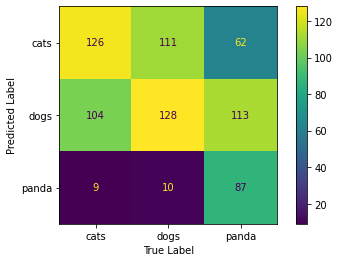

In [ ]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(7,4))
ConfusionMatrixDisplay(confusion_matrix(predict,test_y),
                       display_labels=encoder.classes_).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

Uploading figures 

In [ ]:
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

13-10-2022 02:01:30 Uploading figures


Create a folder named 'test'

In [ ]:
dirname = 'test'
os.mkdir(dirname)

Re-generate test images and put all of them in test/ folder

In [ ]:
for i in range(test_x.shape[0]):
  img = test_x[i].reshape(32,32,3)
  cv2.imwrite(os.path.join(dirname,''.join([str(i),'.jpg'])),img)

Sort image Paths by name: 0.jpg, 1.jpg, 2.jpg, ....

In [ ]:
imagePaths = list(paths.list_images("test"))
imagePaths = sorted(imagePaths, key=lambda x: int(re.search(r"(\d+)\.[a-z]+$", x).group(1)))

Create a table with columns we want to track/compare

In [ ]:
preview_dt = wandb.Table(columns=["test id","image", "target","predict"])

Create a new artifact to store the EDA data

In [ ]:
inference_result = wandb.Artifact(args["deploy"], type="INFERENCE")

Append all images to the artifact

In [ ]:
for i,img in enumerate(imagePaths):
  image = cv2.imread(img)
  preview_dt.add_data(i, 
                      wandb.Image(img), 
                      encoder.inverse_transform([test_y[i]])[0], 
                      encoder.inverse_transform([predict[i]])[0])

Save artifact to W&B

In [ ]:
inference_result.add(preview_dt, "Inference_Table")
run.log_artifact(inference_result)

In [ ]:
run.finish()

Acc,0.45467
F1,0.45752
Precision,0.54418
Recall,0.45467
